# **Artificial Intelligence Laboratory Final Project**

**Project Name:** Improving classification model using SVM and Naive Bayes

**Team Name:** Precision

**Team Members:** Md Ekram Uddin & Safana Quyum Chowdhury

**IDs:** 1703310201404 & 1703310201481

# **Introduction**

**Text classification** is one of the important and typical task in supervised machine learning (ML). Assigning categories to documents, which can be a web page, library book, media articles, gallery etc. has many applications like e.g. spam filtering, email routing, sentiment analysis etc. In this article, I would like to demonstrate how we can do text classification using python, scikit-learn and little bit of NLTK.
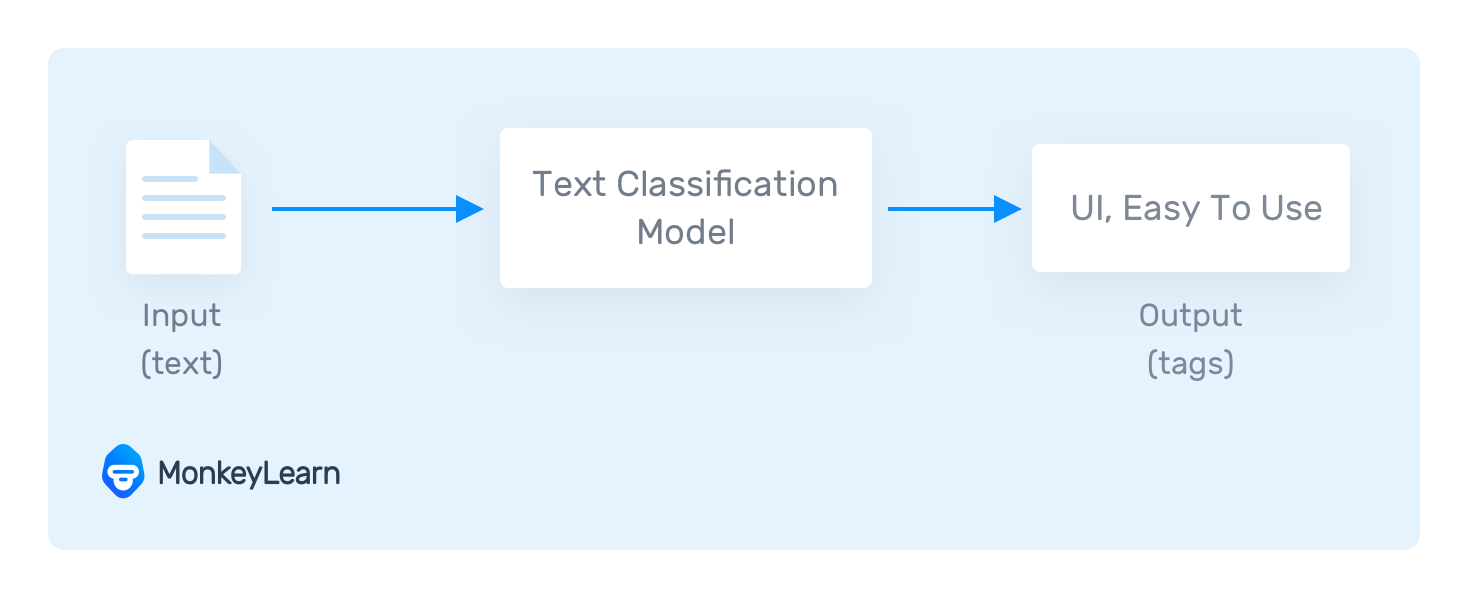

There are many approaches to automatic text classification, but they all fall under three types of systems:
1. Rule-based systems
2. Machine learning-based systems
3. Hybrid systems

In this project I use Machine learning-based systems. Instead of relying on manually crafted rules, machine learning text classification learns to make classifications based on past observations. By using pre-labeled examples as training data, machine learning algorithms can learn the different associations between pieces of text, and that a particular output (i.e., tags) is expected for a particular input (i.e., text). A “tag” is the pre-determined classification or category that any given text could fall into.

The first step towards training a machine learning NLP classifier is feature extraction: a method is used to transform each text into a numerical representation in the form of a vector. One of the most frequently used approaches is bag of words, where a vector represents the frequency of a word in a predefined dictionary of words. 

Then, the machine learning algorithm is fed with training data that consists of pairs of feature sets (vectors for each text example) and tags (e.g. sports, politics) to produce a classification model:

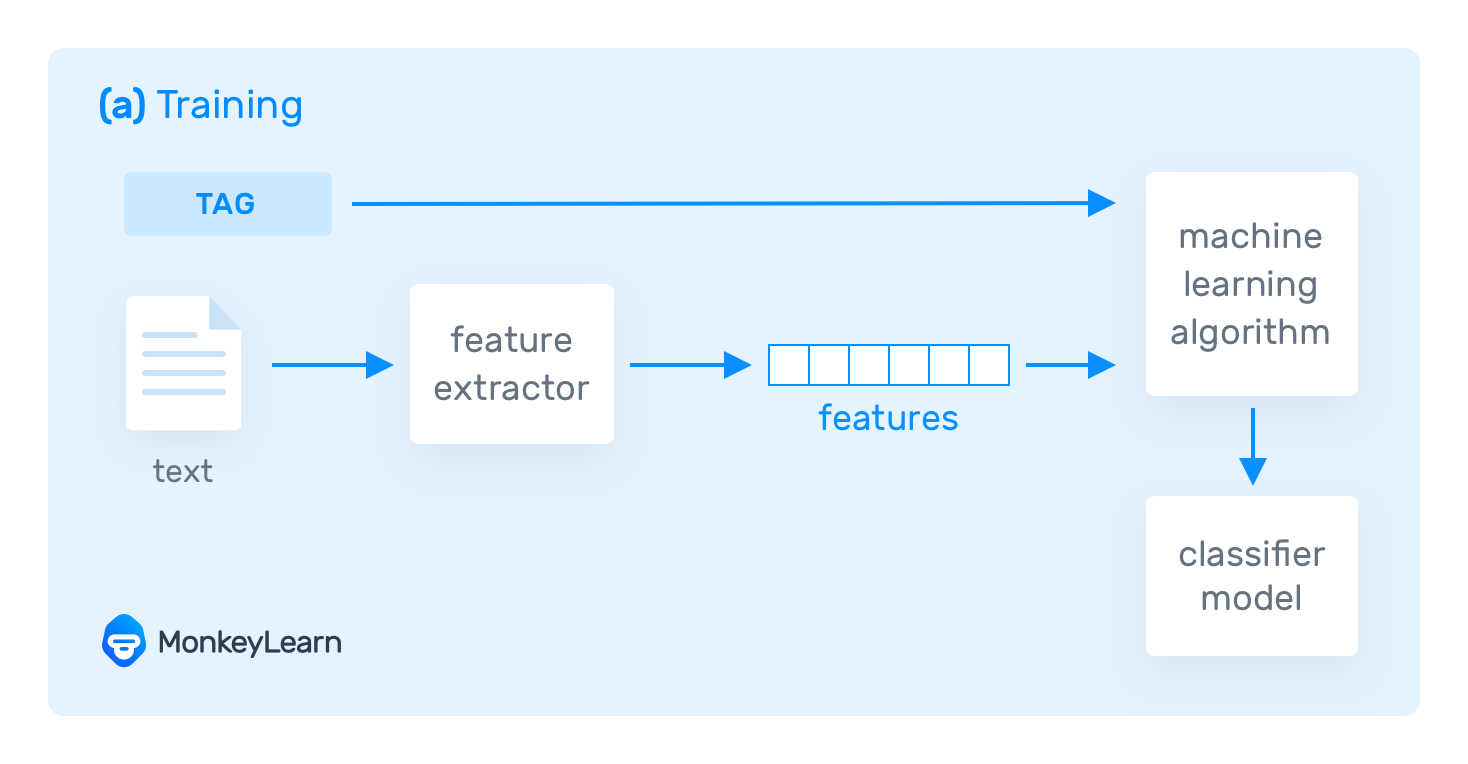

Once it’s trained with enough training samples, the machine learning model can begin to make accurate predictions. The same feature extractor is used to transform unseen text to feature sets, which can be fed into the classification model to get predictions on tags (e.g., sports, politics):

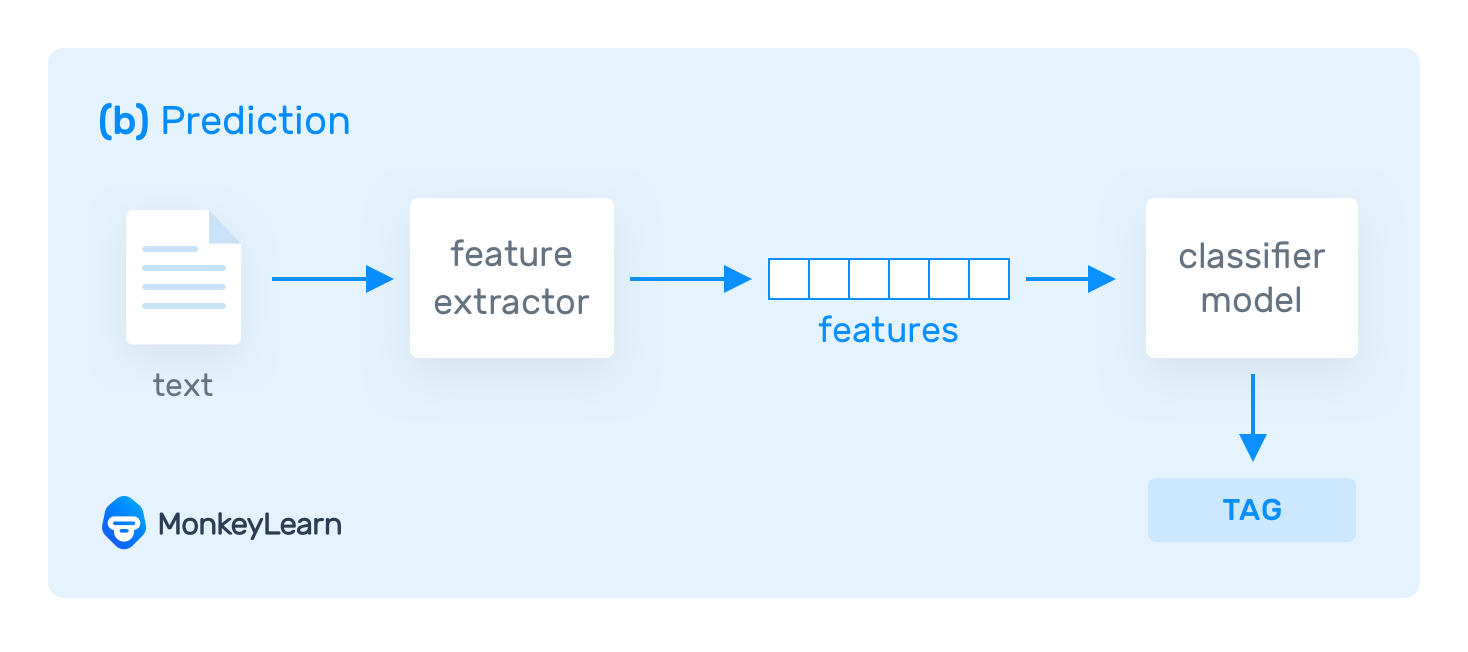

Text classification with machine learning is usually much more accurate than human-crafted rule systems, especially on complex NLP classification tasks. Also, classifiers with machine learning are easier to maintain and you can always tag new examples to learn new tasks.




**Machine Learning Text Classification Algorithms**

Some of the most popular text classification algorithms include the Naive Bayes family of algorithms, support vector machines (SVM).

**Naive Bayes**

The Naive Bayes family of statistical algorithms are some of the most used algorithms in text classification and text analysis, overall.

One of the members of that family is Multinomial Naive Bayes (MNB) with a huge advantage, that you can get really good results even when your dataset isn’t very large (~ a couple of thousand tagged samples) and computational resources are scarce.

Naive Bayes is based on Bayes’s Theorem, which helps us compute the conditional probabilities of the occurrence of two events, based on the probabilities of the occurrence of each individual event. So we’re calculating the probability of each tag for a given text, and then outputting the tag with the highest probability.


The probability of A, if B is true, is equal to the probability of B, if A is true, times the probability of A being true, divided by the probability of B being true.

This means that any vector that represents a text will have to contain information about the probabilities of the appearance of certain words within the texts of a given category, so that the algorithm can compute the likelihood of that text’s belonging to the category.



**Support Vector Machines**

Support Vector Machines (SVM) is another powerful text classification machine learning algorithm, becauseike Naive Bayes, SVM doesn’t need much training data to start providing accurate results. SVM does, however, require more computational resources than Naive Bayes, but the results are even faster and more accurate.

In short, SVM draws a line or “hyperplane” that divides a space into two subspaces. One subspace contains vectors (tags) that belong to a group, and another subspace contains vectors that do not belong to that group.

The optimal hyperplane is the one with the largest distance between each tag. In two dimensions it looks like this:

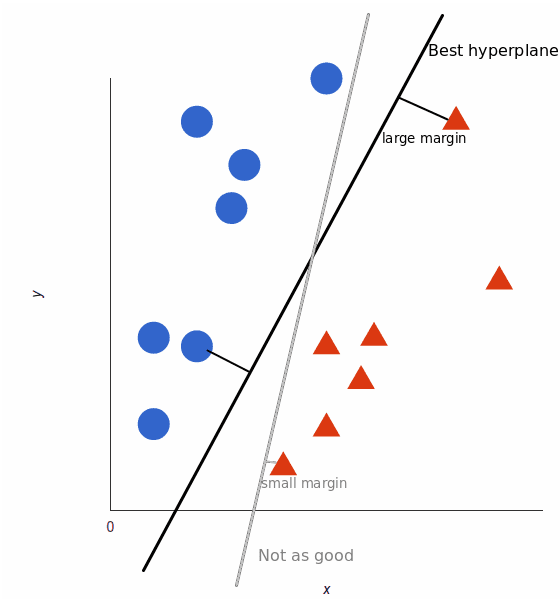

Those vectors are representations of your training texts, and a group is a tag you have tagged your texts with.

As data gets more complex, it may not be possible to classify vectors/tags into only two categories. So, it looks like this:

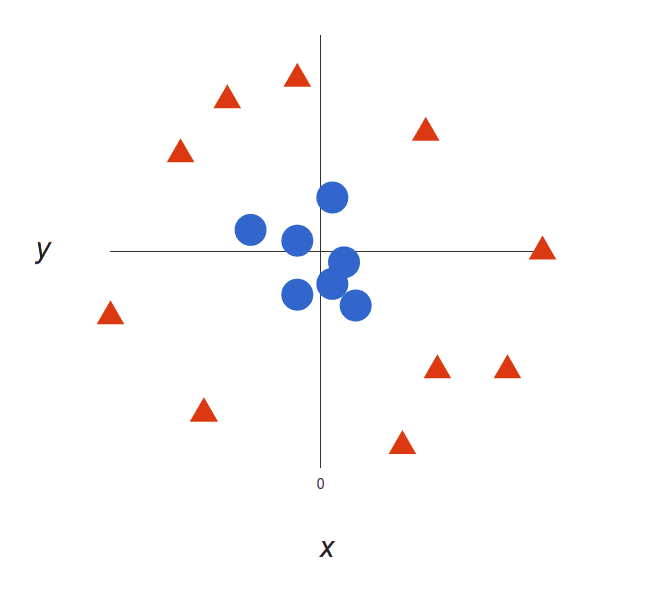

But that’s the great thing about SVM algorithms – they’re “multi-dimensional.” So, the more complex the data, the more accurate the results will be. Imagine the above in three dimensions, with an added Z-axis, to create a circle.

Mapped back to two dimensions the ideal hyperplane looks like this:

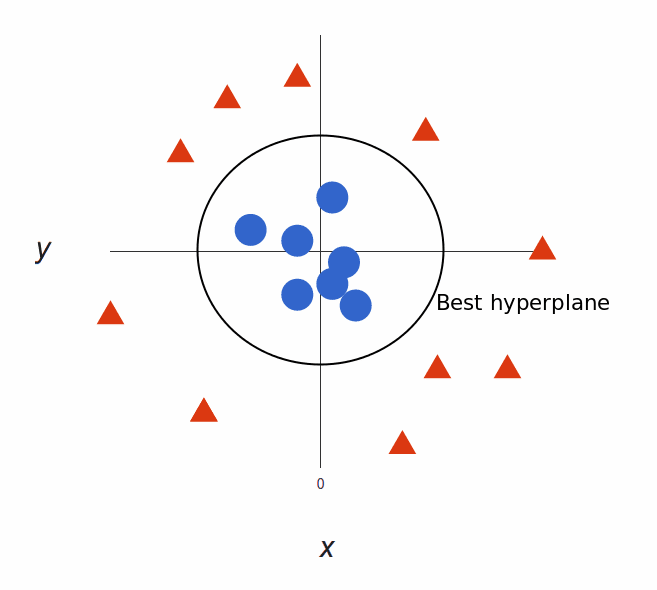

In [186]:
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [187]:
import string
import inflect
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC

In [188]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [189]:
%cd /content/drive/MyDrive/Colab Notebooks/

/content/drive/MyDrive/Colab Notebooks


In [190]:
def read_files(file_loc):
  '''
  This function reads txt data from a file in the drive

  args - a string containing the files location
  returns - a list containing the text data
  '''
  dataset = []
  with open(file_loc, 'r') as train_file:
    # i = 0
    # max = 20000
    for line in train_file:
      # if max>=i:
        dataset.append(line)
      # else: 
      #   break
      # i += 1

  return dataset

In [191]:
def separate_labels(dataset):
  '''This function will separate the labels/class and examples/documents from the dataset'''
  labels = []
  documents = []

  for line in dataset:
    splitted_line = line.strip().split('\t', 1)
    labels.append(splitted_line[0])
    documents.append(splitted_line[1])

  return labels, documents

In [192]:
def remove_url(documents):
  '''This function removes URL's from Texts'''
  url_removed = []

  # Your code here
  for line in documents:
    url_removed.append(re.sub('http[s]?://\S+', '', line))

  return url_removed

In [193]:
def remove_hashtag(documents):
  '''This function will remove all occurences of # from the texts'''
  hashtag_removed = []

  # map hashtag to space
  translator = str.maketrans('#', ' '*len('#'), '')

  for line in documents:
    hashtag_removed.append(line.translate(translator))

  return hashtag_removed

In [194]:
def remove_whitespaces(documents):
  '''This function removes multiple whitespaces and replace them with a single whitespace'''
  whitespace_removed = []

  for line in documents:
    whitespace_removed.append(' '.join(line.split()))

  return whitespace_removed

In [195]:
def text_lowercasing(documents):
  lowercased_docs = []

  for line in documents:
    lowercased_docs.append(line.lower())

  return lowercased_docs

In [196]:
def tokenize_sentence(documents):
  '''This function takes a line and provides tokens/words by splitting them using NLTK'''
  
  tokenized_docs = []
  
  for line in documents:
    tokenized_docs.append(word_tokenize(line))

  return tokenized_docs

In [197]:
def char_n_gram_ready(documents):
  '''An n-gram is a contiguous sequence of n items from a given sample of text or speech'''
  joined_docs = []

  for line in documents:
    joined_docs.append(' '.join(line))

  return joined_docs

In [198]:
def remove_punctuation(documents):

  punct_removed = []

  for doc in documents:
    temp = []
    for word in doc:
      if word not in string.punctuation:
        temp.append(word)
    
    punct_removed.append(temp)

  return punct_removed

In [199]:
def remove_stopwords(documents):
  
  stopword_removed = []

  stop_words = set(stopwords.words('english'))

  for doc in documents:
    temp = []
    for word in doc:
      if word not in stop_words:
        temp.append(word)
    
    stopword_removed.append(temp)

  return stopword_removed

In [200]:
def apply_stemmer(documents):
  stemmed_docs = []
  
  stemmer = PorterStemmer()

  for doc in documents:
    stemmed_docs.append([stemmer.stem(plural) for plural in doc])

  return stemmed_docs

In [201]:
def identity(X):
  return X

In [202]:
def vec_tfidf(tfidf = True):

  if tfidf:
    vec = TfidfVectorizer(preprocessor = identity, analyzer='word',
                          tokenizer = identity, ngram_range = (1,3))
    # vec = TfidfVectorizer(preprocessor = identity, 
    #                       tokenizer = identity)
  else:
    # vec = CountVectorizer(preprocessor = identity, lowercase=True, analyzer='char',
    #                       tokenizer = identity, ngram_range = (2,5))
    
    vec = CountVectorizer(preprocessor = identity,
                          tokenizer = identity)
    
  return vec

In [203]:
def SVM_Static(train_docs, train_lbls, test_docs, test_lbls):

  vec = vec_tfidf(tfidf = True)
    
  # combines the vectorizer with the SVM classifier
  classifier = Pipeline([('vec', vec),
                         ('cls', SVC(kernel='linear'))])
  
  classifier.fit(train_docs, train_lbls)

    # predict is for predicting label for document test data by using predict method
  prediction = classifier.predict(test_docs)
  
  file = open("datasets/News_Classification/labels.txt", mode="w")
  file.close()
  for label in prediction:
    file = open("datasets/News_Classification/labels.txt", "a", encoding='utf-8')
    file.write(str(label))
    file.write("\n")
  file.close()

  print("SVM Accuracy = ", accuracy_score(test_lbls, prediction))
  print()

  print(classification_report(test_lbls, prediction, labels=classifier.classes_, digits=3))


In [204]:
def Naive_Bayes(train_docs, train_lbls, test_docs, test_lbls):

  vec = vec_tfidf(tfidf = False)
    
  # combines the vectorizer with the Naive Bayes classifier
  classifier = Pipeline([('vec', vec),
                         ('cls', MultinomialNB())])
  
  classifier.fit(train_docs, train_lbls)

  prediction = classifier.predict(test_docs)

  print("Naive Bayes Accuracy = ", accuracy_score(test_lbls, prediction))
  print()

  print(classification_report(test_lbls, prediction, labels=classifier.classes_, digits=3))

In [205]:
def pre_processing(documents):

  documents = remove_url(documents)

  documents = remove_hashtag(documents)

  documents = remove_whitespaces(documents)

  # documents = text_lowercasing(documents)

  documents = tokenize_sentence(documents)

  documents = remove_punctuation(documents)

  documents = remove_stopwords(documents)

  documents = apply_stemmer(documents)

  # If we use character n_gram you have to enable it | else comment the below line
  documents = char_n_gram_ready(documents)

  return documents

In [206]:
def main():
  print('Reading The Dataset...')
  
  # Reading the training data
  training_dataset = read_files('datasets/News_Classification/train.txt')
  train_labels, train_docs = separate_labels(training_dataset[:1000])

  # Reading the test data
  test_dataset = read_files('datasets/News_Classification/dev.txt')
  test_labels, test_docs = separate_labels(test_dataset[:1000])
  
  # calling the pre processing dunction
  train_docs = pre_processing(train_docs)
  test_docs = pre_processing(test_docs)
  # print(train_docs)

  print('\nTraining the Classifier...')
  SVM_Static(train_docs, train_labels, test_docs, test_labels)
  Naive_Bayes(train_docs, train_labels, test_docs, test_labels)

  for lbl, doc in zip(train_labels[:5], train_docs[:5]):
    print(lbl)
    print(doc)
    print()

if __name__ == '__main__':
  main()

Reading The Dataset...

Training the Classifier...
SVM Accuracy =  0.644

              precision    recall  f1-score   support

    Business      0.833     0.317     0.459       205
    Sci_Tech      0.445     0.957     0.607       253
      Sports      0.912     0.606     0.728       274
       World      0.872     0.638     0.737       268

    accuracy                          0.644      1000
   macro avg      0.766     0.629     0.633      1000
weighted avg      0.767     0.644     0.645      1000

Naive Bayes Accuracy =  0.482

              precision    recall  f1-score   support

    Business      0.394     0.346     0.369       205
    Sci_Tech      0.455     0.502     0.477       253
      Sports      0.551     0.555     0.553       274
       World      0.498     0.493     0.495       268

    accuracy                          0.482      1000
   macro avg      0.475     0.474     0.474      1000
weighted avg      0.480     0.482     0.481      1000

Business
wall st. bear cl

# **Conclusion:**

In this project, we have proposed the combination of PSO and CFSfor selecting features, which are then tested over three methods (i.e., k-NN, SVM andNaive Bayes) on diﬀerent data sets. Be-fore this selection, the data are ﬁrstly pre-processed. This comprises normalization and discretization data
In the future, this proposed method can be implemented to other datasets. This isto measure its capability to work on various characteristics of data. Also, more datareduction may be done to have simpler data. It is intended to reduce running time andcomplexity